Maastikuökoloogia

__Evelyn Uuemaa, PhD__

- Praktikumi lisa

    Tudengid laevad üles oma CSV-faili ja saavad selle põhjal teha karpdiagrammid. Ühtlasi saavad nad tulemuse aruande jaoks pildifailina alla laadida.

## Kuidas seda skripti kasutada

Mine hiirega kõige esimesele kastile ja vajuta "Run" nuppu, et üksus läbi jooksutada ja minna järgmiste plokkide juurde. Kui midagi valesti läheb, saad sa lihtsasti uuesti algusest alustada.

In [1]:
from IPython.display import display
import ipywidgets as widgets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

%matplotlib inline

Ülejärgmise ploki juures tuleb sul arvutist valida äsja salvestatud CSV-fail. Kui sinu CSV-faili eraldusmärgiks on koma, pole vaja midagi muuta. Kui aga semikoolon, tee muutus järgmises plokis: csv_delimiter = ";".

In [2]:
upload = widgets.FileUpload( accept='.csv', multiple=False )

csv_delimiter = ","
text_encoding = "utf8"

In [3]:
upload

FileUpload(value={}, accept='.csv', description='Upload')

Kui oled faili oma arvutist valinud, peaks üleslaadimise lahter näitama "Upload (1)", mis tähendab, et fail on nüüd valitud.

Jooksuta läbi järgmine plokk. Tulemuseks peaks olema ilus tabel, mitte ühes jorus tekst. Kui näed väärtuste vahel semikooloneid (;), tuleb teises plokis teha parandus (csv_delimiter = ";").

In [4]:
filestream_encoding = "latin1"

t = upload.data[0].decode(encoding=filestream_encoding)

with open('tmp.csv', 'w', encoding=text_encoding) as fh:
    fh.write(t)

df = pd.read_csv('tmp.csv', encoding=text_encoding, sep=csv_delimiter)

df.head(10)

,Name,Liik,RunDate,Run,Class,SDI,SEI,AWMSI,MSI,MPAR,MPFD,ED,MPE,MPS,NumP,MedPS,PSCoV,TLA
0,80662_clip,rukkirääk,16.01.2018 15:28:02,1,All,1.850,0.889,1.562,1.542,176.240,1.281,89.116,2799.470,31.414,10.0,23.578,82.803,314.139
1,79202_clip,rukkirääk,16.01.2018 15:28:02,2,All,0.936,0.675,1.752,1.724,334.480,1.307,70.888,4454.041,62.832,5.0,66.056,56.717,314.159
2,79200_clip,rukkirääk,16.01.2018 15:28:02,3,All,0.860,0.621,1.541,1.630,142.683,1.282,67.981,3559.491,52.360,6.0,38.030,86.933,314.159
3,78355_clip,rukkirääk,16.01.2018 15:28:03,4,All,1.495,0.835,1.520,1.657,275.600,1.310,74.101,2909.832,39.268,8.0,21.056,106.491,314.148
4,78354_clip,rukkirääk,16.01.2018 15:28:03,5,All,1.512,0.777,1.856,1.721,209.810,1.305,91.338,2869.440,31.416,10.0,12.886,126.807,314.156
5,77340_clip,rukkirääk,16.01.2018 15:28:03,6,All,1.725,0.785,1.612,1.796,557.838,1.349,93.960,2270.582,24.165,13.0,8.825,115.645,314.150
6,73713_clip,rukkirääk,16.01.2018 15:28:03,7,All,1.319,0.820,2.197,1.856,141.457,1.298,92.936,4170.936,44.880,7.0,20.930,107.395,314.159
7,73708_clip,rukkirääk,16.01.2018 15:28:04,8,All,1.259,0.703,2.060,1.685,905.638,1.351,86.782,3407.935,39.270,8.0,22.043,115.587,314.159
8,67910_clip,rukkirääk,16.01.2018 15:28:04,9,All,1.763,0.848,1.638,1.515,153.569,1.281,104.650,2528.880,24.165,13.0,20.436,77.969,314.147
9,64432_clip,rukkirääk,16.01.2018 15:28:04,10,All,1.067,0.663,1.566,1.532,136.180,1.272,59.173,3717.490,62.824,5.0,32.007,112.659,314.121


Nüüd on andmed loetud *dataframe*-formaati ja me saame arvutada statistikuid ning teha jooniseid. Muuda järgmises plokis muutuja "classes" väärtust, kui sul on see tulp mõne teise nimega kui "Liik" (nt "liik"). Seejärel jooksuta järgmist plokki, et saada karpvurrdiagramm.

Iga järgmise näitajaga joonise tegemiseks muuda siin ka "values" väärtust (nt values = "SEI", values = "AWMSI" jne).

In [5]:
classes = "Liik"

values = "SDI"

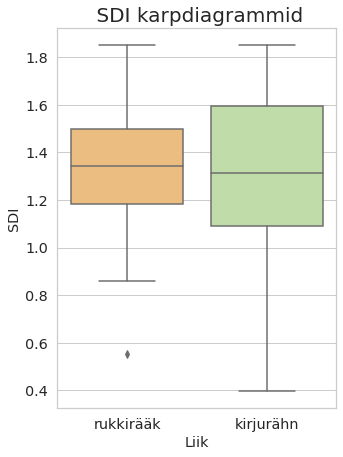

In [6]:
df['values_prep'] = pd.to_numeric(df[values], errors='coerce')

df = df.rename(columns={values : f"{values}_"})
df = df.rename(columns={'values_prep' : values})

fig, ax = plt.subplots(figsize=(5,7))

sns.boxplot(x=classes, y=values, data=df.dropna(subset=[classes, values]), palette="Spectral")
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)
plt.xlabel(classes, fontsize='x-large')
plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)
plt.ylabel(values, fontsize='x-large')

plt.title(f" {values} karpdiagrammid", fontsize=20)

plt.savefig('boxplots.png', bbox_inches='tight', transparent=False)
plt.show()

[lae joonis alla siit](boxplots.png)

Alternatiivina võid ka pildi lihtsalt otse kopeerida, vajutades hiire parema klõpsuga pildil.

## Mann-Whitney U test

A Mann-Whitney U test (sometimes called the Wilcoxon rank-sum test) is used to compare the differences between two independent samples when the sample distributions are not normally distributed and the sample sizes are small.

In [7]:
from scipy.stats import mannwhitneyu

if not len(df[classes].unique()) == 2:
    print("Warning, to compare two groups in the statistical tests, we need only two different types in classes")

group1 = df.loc[df[classes] == df[classes].unique()[0]][values]
group2 = df.loc[df[classes] == df[classes].unique()[1]][values]

#perform the Mann-Whitney U test
result = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"The test statistic is {result.statistic}")
print(f"The corresponding two-sided p-value is {result.pvalue}")

The test statistic is 1271.0
The corresponding two-sided p-value is 0.8876142027643368


Interpret the results.

The Mann-Whitney U Test uses the following null and alternative hypotheses:

H0 (Null Hypothesis): The distribution of values is equal between the two groups

HA (Alternative Hypothesis): The distribution of values is NOT equal between the two groups

If the p-value is not smaller than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the distribution of values is different between the two groups.